In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("delhi_air_qualti.csv")

# Show top rows
df.head()


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [5]:
# Check missing values
df.isnull().sum()

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where Date conversion failed (if any)
df = df.dropna(subset=['Date'])

# Check data types and basic stats
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1461 non-null   datetime64[ns]
 1   Month           1461 non-null   int64         
 2   Year            1461 non-null   int64         
 3   Holidays_Count  1461 non-null   int64         
 4   Days            1461 non-null   int64         
 5   PM2.5           1461 non-null   float64       
 6   PM10            1461 non-null   float64       
 7   NO2             1461 non-null   float64       
 8   SO2             1461 non-null   float64       
 9   CO              1461 non-null   float64       
 10  Ozone           1461 non-null   float64       
 11  AQI             1461 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 137.1 KB


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,1970-01-01 00:00:00.000000015,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
min,1970-01-01 00:00:00.000000001,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,1970-01-01 00:00:00.000000008,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,1970-01-01 00:00:00.000000016,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,1970-01-01 00:00:00.000000023,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,1970-01-01 00:00:00.000000031,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000
std,NaN,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076


In [3]:
df.columns

Index(['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI'],
      dtype='object')

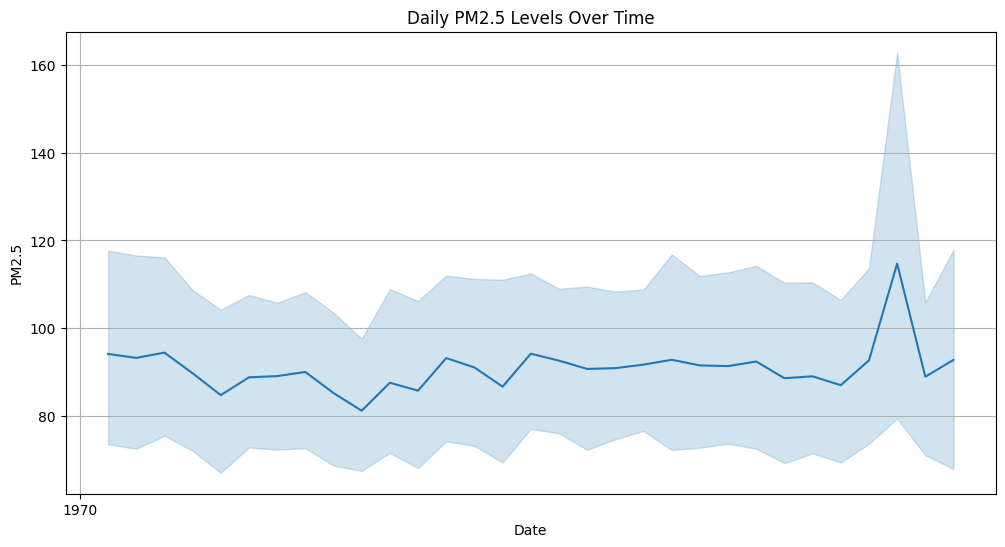

In [6]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='PM2.5', data=df)
plt.title('Daily PM2.5 Levels Over Time')
plt.ylabel('PM2.5')
plt.xlabel('Date')
plt.grid()
plt.show()


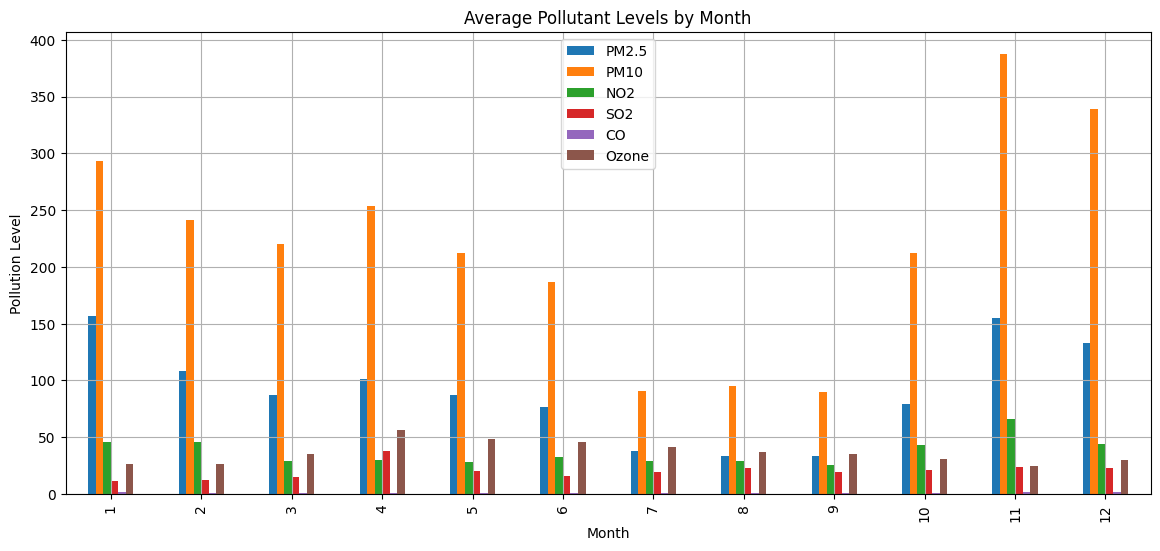

In [7]:
monthly_avg = df.groupby('Month')[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']].mean()

monthly_avg.plot(kind='bar', figsize=(14,6))
plt.title("Average Pollutant Levels by Month")
plt.ylabel("Pollution Level")
plt.xlabel("Month")
plt.grid()
plt.show()


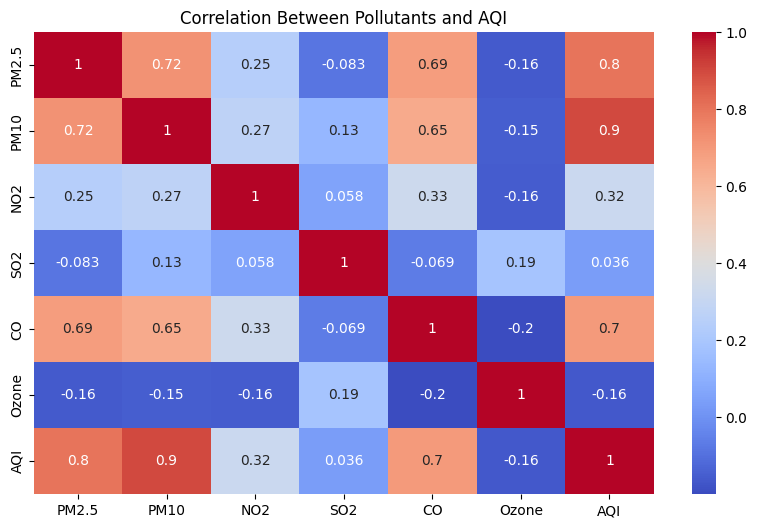

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['PM2.5','PM10','NO2','SO2','CO','Ozone','AQI']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutants and AQI")
plt.show()


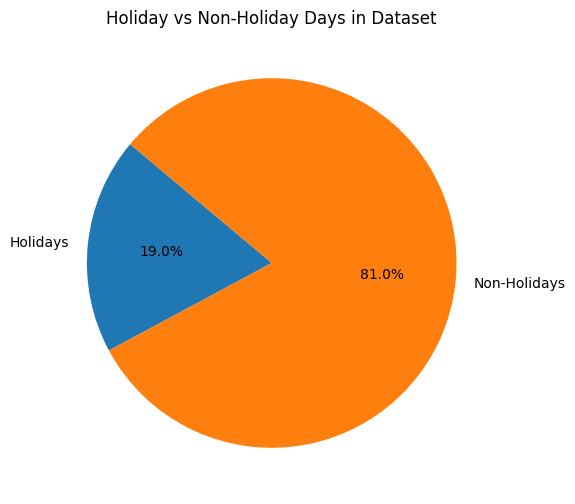

In [16]:
# Count holiday vs non-holiday days
holiday_days = df[df['Holidays_Count'] > 0].shape[0]
non_holiday_days = df[df['Holidays_Count'] == 0].shape[0]

plt.figure(figsize=(6,6))
plt.pie([holiday_days, non_holiday_days], labels=['Holidays', 'Non-Holidays'], autopct='%1.1f%%', startangle=140)
plt.title('Holiday vs Non-Holiday Days in Dataset')
plt.show()


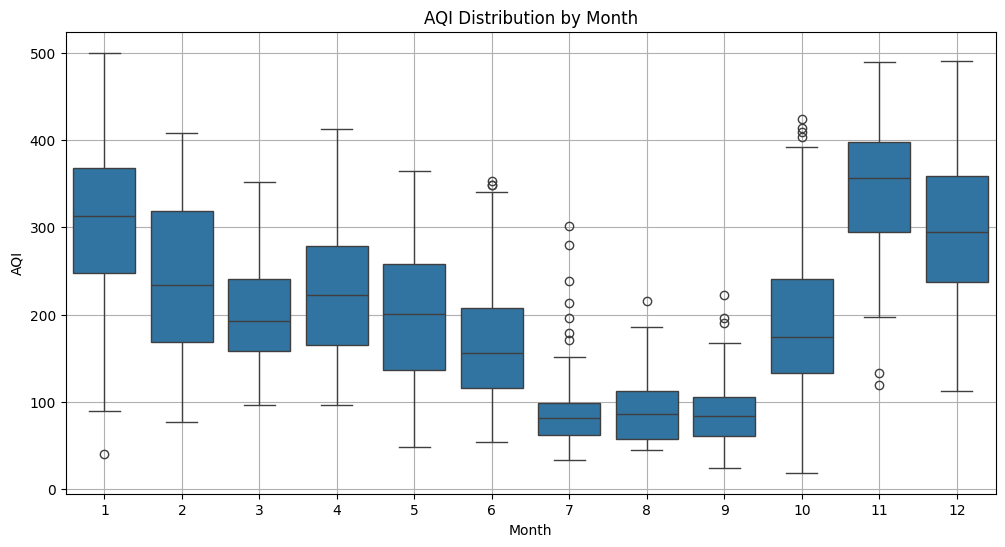

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='AQI', data=df)
plt.title('AQI Distribution by Month')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.grid()
plt.show()


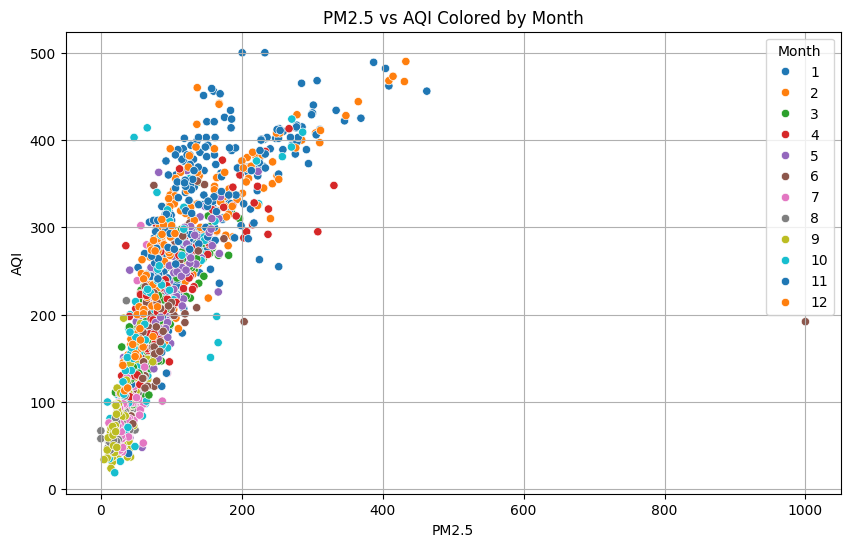

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PM2.5', y='AQI', hue='Month', palette='tab10')
plt.title('PM2.5 vs AQI Colored by Month')
plt.grid()
plt.show()


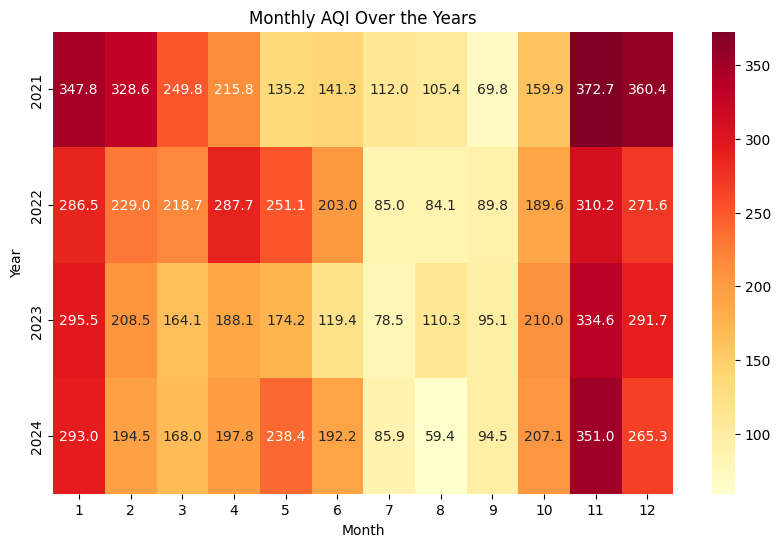

In [21]:
pivot_table = df.pivot_table(values='AQI', index='Year', columns='Month', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt=".1f")
plt.title('Monthly AQI Over the Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df_model = df.dropna(subset=['PM2.5','PM10','NO2','SO2','CO','Ozone','AQI'])

In [12]:
X = df_model[['PM2.5','PM10','NO2','SO2','CO','Ozone']]
y = df_model['AQI']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.8877085002447456
MSE: 1457.1636501727603
